In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 

In [2]:
def createrandomp(n):
    

    p=[]
    for i in range(n):
        while True:
            a=np.random.random()
            b=np.random.random()

            if not((a,b) in p):
                p.append((a,b))
                break
    return p

def plot(p):
    x=[i[0] for i in p]
    y=[i[1] for i in p]
    n= [i for i in range (len(p))]
    fig, ax = plt.subplots()
    ax.scatter(x, y)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
def dist(p,i,j):
    return (((p[i][0]-p[j][0])**2)+((p[i][1]-p[j][1])**2))**0.5


def custompath(p,path):
    d=0
    for i in range(0,len(path)):
        d+=dist(p,path[i],path[i-1])
        #d+=dist(p,path[-1], path[0])
    return d
            
def printpath(p,path):
    
    x=[p[i][0] for i in path]
    x.append(x[0])
    y=[p[i][1] for i in path]
    y.append(y[0])
    #plt.plot(x,y)
    #plt.plot(x, y, 'ro', 'k')
    plt.plot(x, y, 'r', zorder=1, lw=3)
    plt.scatter(x, y, s=120, zorder=2)
    

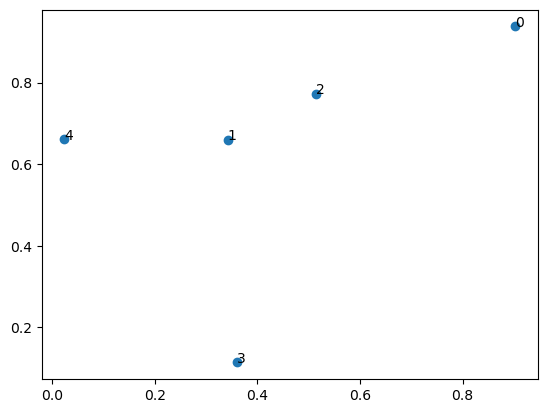

In [3]:
n=5
p=createrandomp(n)
plot(p)

In [58]:
def createinitials(p):
    l=[]
    
    for i in range (len(p)):
        '''for j in range(i+1,len(p)):
            for k in range (j+1,len(p)):
                l.append([i,j,k])'''
        l.append([i])
        
    return l
                        
                    

In [5]:
l= createinitials(p)
l

[[0], [1], [2], [3], [4]]

In [22]:
def addpt(p,l):
    l1=[]
    for init in l:
        
        #print("init:", init)
        length=custompath(p,init)
        m=length+10
        for i in range (len(p)):
           
            
            
            if not(i in init):
                for j in range(len(init)):
                    init1=init.copy()
                    init1.insert(j,i)
                    #print(init1,custompath(p,init1)-custompath(p,init),m)
                    if custompath(p,init1)-length<m:
                        #print('change', init1)
                        best=init1.copy()
                        #print(best)
                        m=custompath(p,init1)-length
        #print('chosen', best)
        l1.append(best)
    return l1

In [23]:
addpt(p,l)

[[31, 0],
 [15, 1],
 [19, 2],
 [16, 3],
 [37, 4],
 [47, 5],
 [22, 6],
 [25, 7],
 [49, 8],
 [48, 9],
 [31, 10],
 [46, 11],
 [40, 12],
 [24, 13],
 [43, 14],
 [49, 15],
 [36, 16],
 [3, 17],
 [40, 18],
 [34, 19],
 [28, 20],
 [0, 21],
 [6, 22],
 [22, 23],
 [13, 24],
 [7, 25],
 [50, 26],
 [30, 27],
 [20, 28],
 [33, 29],
 [27, 30],
 [0, 31],
 [44, 32],
 [49, 33],
 [35, 34],
 [34, 35],
 [16, 36],
 [10, 37],
 [9, 38],
 [18, 39],
 [18, 40],
 [18, 41],
 [6, 42],
 [14, 43],
 [14, 44],
 [50, 45],
 [11, 46],
 [26, 47],
 [8, 48],
 [8, 49],
 [45, 50]]

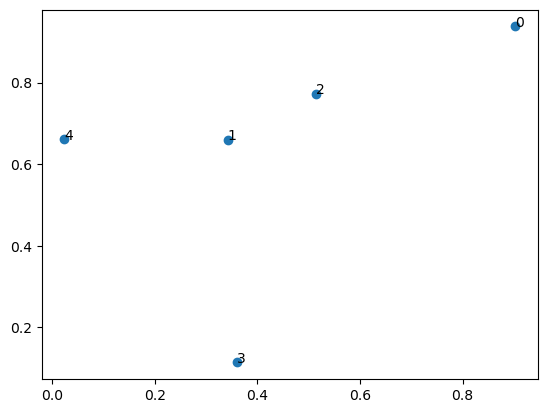

In [8]:
plot(p)

In [9]:
def addall(p,l):
    l1=addpt(p,l)
    print(len(l1[0]))
    if len(l1[0])!=len(p):
        return addall(p,l1)
    else:
        return l1

In [10]:
paths= addall(p,l)

2
3
4
5


In [11]:
paths

[[3, 4, 1, 2, 0],
 [4, 3, 0, 2, 1],
 [1, 4, 3, 0, 2],
 [0, 2, 1, 4, 3],
 [1, 2, 0, 3, 4]]

In [12]:
def bestpath(p, paths):
    lengths=[]
    for i in paths:
        lengths.append (custompath(p, i))
    #print(lengths)
    #print(paths)
    minim=lengths[0]
    optim=paths[0]
    for i in range(len(lengths)):
        if lengths[i]<minim:
            minim=lengths[i]
            optim= paths[i]
    print(minim)
    return optim

In [13]:
bestpath(p, paths)

2.5743584915880464


[4, 3, 0, 2, 1]


# test: choose number of cities n (better not exceed 15 for now because the complexity of the algorithm is between O(n5) and O(n6))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
4.203345048425433
time spent:  4.54640531539917 s for  30 points


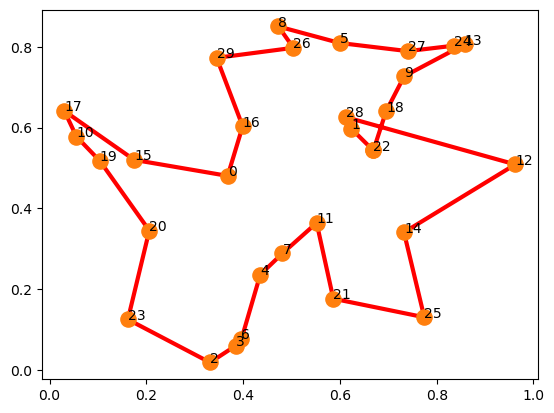

In [62]:
n=30
p=createrandomp(n)

plot(p)
t=time.time()
l= createinitials(p)
paths= addall(p,l)
best=bestpath(p, paths)
printpath(p,best)
leng1=custompath(p,best)
print('time spent: ', time.time()-t, 's for ', n , 'points')

In [63]:

import time                  
import pandas as pd         



dataset = pd.read_csv('dataset.csv')  

In [64]:
p=[]
for i in np.array(dataset):
    p.append((i[1],i[2]))
    

In [65]:
p=np.array(p)/100

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


KeyboardInterrupt: 

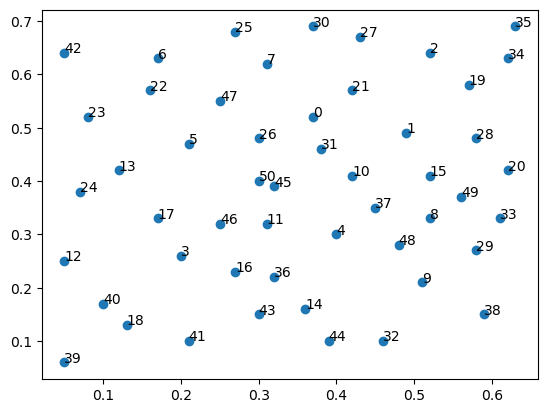

In [66]:

plot(p)
t=time.time()
l= createinitials(p)
paths= addall(p,l)
best=bestpath(p, paths)
printpath(p,best)
leng1=custompath(p,best)
print('time spent: ', time.time()-t, 's for ', n , 'points')

In [67]:
# Python program to store list to file using pickle module
import pickle

# write list to binary file
def write_list(a_list):
    # store list in binary file so 'wb' mode
    with open('listfile', 'wb') as fp:
        pickle.dump(a_list, fp)
        print('Done writing list into a binary file')

# Read list to memory
def read_list():
    # for reading also binary mode is important
    with open('the fathers', 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

# list of names


paths= read_list()
print('List is',paths)

List is [[27, 30, 25, 7, 21, 0, 26, 47, 6, 22, 42, 23, 24, 13, 5, 50, 46, 17, 3, 16, 12, 40, 39, 18, 41, 43, 44, 32, 14, 36, 11, 45, 31, 10, 37, 4, 48, 8, 9, 38, 29, 33, 20, 49, 15, 1, 28, 19, 34, 35, 2], [17, 46, 45, 50, 5, 13, 24, 23, 42, 22, 6, 25, 30, 27, 7, 47, 26, 0, 31, 21, 1, 2, 35, 34, 19, 28, 20, 15, 10, 37, 49, 33, 29, 38, 9, 8, 48, 4, 11, 36, 14, 32, 44, 43, 41, 18, 39, 40, 12, 16, 3], [14, 32, 44, 41, 18, 39, 40, 12, 43, 36, 16, 3, 17, 11, 46, 10, 31, 45, 50, 5, 13, 24, 23, 42, 22, 6, 25, 30, 27, 7, 47, 26, 0, 21, 1, 2, 35, 34, 19, 28, 20, 15, 49, 33, 29, 38, 9, 8, 48, 37, 4], [47, 23, 42, 22, 6, 25, 30, 27, 7, 0, 21, 1, 2, 35, 34, 19, 28, 20, 15, 49, 33, 29, 38, 9, 8, 48, 4, 37, 10, 31, 45, 11, 36, 14, 32, 44, 43, 41, 18, 39, 40, 12, 24, 13, 16, 3, 17, 46, 50, 26, 5], [22, 42, 23, 47, 5, 50, 46, 17, 3, 16, 13, 24, 12, 40, 39, 18, 41, 43, 44, 32, 14, 36, 11, 45, 26, 0, 31, 10, 37, 4, 48, 8, 9, 38, 29, 33, 49, 15, 20, 28, 1, 21, 19, 34, 35, 2, 27, 30, 7, 25, 6], [47, 6, 22,

In [68]:
p=[]
for i in np.array(dataset):
    p.append((i[1],i[2]))
fathers=[]
for i in range (len(paths)):
    fitest=[]
    l=custompath(p,paths[i])
    path= paths[i]
    for j in path:
        fitest.append([p[j][0],p[j][1] ] )
    fathers.append([l,fitest])

In [69]:
fathers

[[473.17762621471564,
  [[43, 67],
   [37, 69],
   [27, 68],
   [31, 62],
   [42, 57],
   [37, 52],
   [30, 48],
   [25, 55],
   [17, 63],
   [16, 57],
   [5, 64],
   [8, 52],
   [7, 38],
   [12, 42],
   [21, 47],
   [30, 40],
   [25, 32],
   [17, 33],
   [20, 26],
   [27, 23],
   [5, 25],
   [10, 17],
   [5, 6],
   [13, 13],
   [21, 10],
   [30, 15],
   [39, 10],
   [46, 10],
   [36, 16],
   [32, 22],
   [31, 32],
   [32, 39],
   [38, 46],
   [42, 41],
   [45, 35],
   [40, 30],
   [48, 28],
   [52, 33],
   [51, 21],
   [59, 15],
   [58, 27],
   [61, 33],
   [62, 42],
   [56, 37],
   [52, 41],
   [49, 49],
   [58, 48],
   [57, 58],
   [62, 63],
   [63, 69],
   [52, 64]]],
 [490.0053058090409,
  [[17, 33],
   [25, 32],
   [32, 39],
   [30, 40],
   [21, 47],
   [12, 42],
   [7, 38],
   [8, 52],
   [5, 64],
   [16, 57],
   [17, 63],
   [27, 68],
   [37, 69],
   [43, 67],
   [31, 62],
   [25, 55],
   [30, 48],
   [37, 52],
   [38, 46],
   [42, 57],
   [49, 49],
   [52, 64],
   [63, 69],
  

In [70]:
write_list(fathers)


Done writing list into a binary file


In [71]:
def getCity():
    cities = []
    f = open("wi29.tsp")
    for i in f.readlines():
        if not( "EOF" in i):
            
            node_city_val = i.split()
            cities.append((float(node_city_val[1]), float(node_city_val[2])))
    return cities

In [72]:
p=getCity()

In [73]:
p=np.array(p)/100000
p

array([[0.20833333, 0.171     ],
       [0.209     , 0.17066667],
       [0.213     , 0.13016667],
       [0.216     , 0.1415    ],
       [0.216     , 0.14966667],
       [0.216     , 0.165     ],
       [0.22183333, 0.13133333],
       [0.22583333, 0.143     ],
       [0.22683333, 0.12716667],
       [0.23616667, 0.15866667],
       [0.237     , 0.15933333],
       [0.23883333, 0.14533333],
       [0.24166667, 0.1325    ],
       [0.25149167, 0.12365833],
       [0.26133333, 0.145     ],
       [0.2615    , 0.1055    ],
       [0.26283333, 0.12766667],
       [0.26433333, 0.13433333],
       [0.2655    , 0.1385    ],
       [0.26733333, 0.11683333],
       [0.27026111, 0.13051944],
       [0.27096111, 0.13415833],
       [0.27153611, 0.13203333],
       [0.27166667, 0.09833333],
       [0.27233333, 0.1045    ],
       [0.27233333, 0.11783333],
       [0.27266667, 0.10383333],
       [0.27433333, 0.124     ],
       [0.274625  , 0.12992222]])

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0.29491888749486467
time spent:  9.68578052520752 s for  30 points


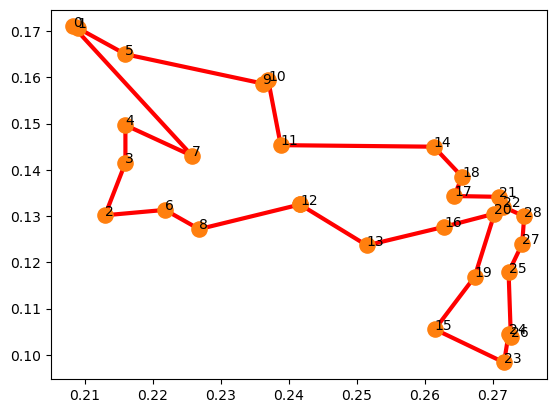

In [74]:

plot(p)
t=time.time()
l= createinitials(p)
paths= addall(p,l)
best=bestpath(p, paths)
printpath(p,best)
leng1=custompath(p,best)
print('time spent: ', time.time()-t, 's for ', n , 'points')

<img src="witour (1).jpg" alt="Alternative text" />

cost of the actual solution

In [83]:

custompath(p,[12,
 8,
 6,
 2,
 3,
 7,
 4,
 0,
 1,
 5,
 9,
 10,
 11,
 14,
 18,
 17,
 16,20,21,28,27,25,19,24,26,23,15,13])

0.2756697027326942

error 

In [85]:
(0.29491888749486467-0.2756697027326942)/0.2756697027326942

0.06982698704774107